In [133]:
import pandas as pd
from rapidfuzz import fuzz
from itertools import combinations
from collections import defaultdict
import json
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [134]:
df2016=pd.read_excel('kenya-accidents-database.xlsx',sheet_name='2016')
df2017=pd.read_excel('kenya-accidents-database.xlsx',sheet_name='2017')

In [135]:
df2016.head()

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 12
0,630,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,26,7.0,M/CYCLIST,1,2016-06-25,so MM/DD/YYYY is the solution :)
1,830,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,28,25.0,M/CYCLIST,1,2016-06-25,NaN
2,1330,MARIAKANI,KILIFI,MOMBASA-NAIROBI,KATOLANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,M,A & J,98.0,M/CYCLIST,1,2016-06-25,NaN
3,2100,ONGATA RONGAI,NAKURU,NAKURU-NAIROBI,MAASAI LODGE,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,M,65,29.0,PEDESTRIAN,1,2016-06-25,NaN
4,1900,MATUU,MACHAKOS,MATUU-MWINGI,KIVANDINI,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,M,A,10.0,PASSENGER,1,2016-06-25,NaN


In [136]:
for x in df2016['ROAD']:
    
    if isinstance(x, str) and '-' in x:
        x = x.replace('-', ' ')

df2016['ROAD'].unique() 

array(['KITUI-ITHOKWE', 'MOMBASA-NAIROBI', 'NAKURU-NAIROBI',
       'MATUU-MWINGI', 'KATITO-KENDU BAY', 'MAKUTANO-MWEA',
       'KENYATTA AVENUE', 'EASTERN BY PASS', 'NYERI-THIKA',
       'LIKONI-LINGALUNGA', 'KENDU BAY-KASITI', 'MERU-MAUA',
       'NAKURU NAIROBI', 'MIGORI KISII', 'KEROKA KISII',
       'NJORO MAU NAROK', 'HAILE SELASIE ROAD', 'GITHUNGURI ROAD',
       'MOMBASA NAIROBI', 'HAILE SELASIE', 'BONDO USENGE', 'RUIRU KIAMBU',
       'KIMILILI CHWELE ROAD', 'NGONG NAIROBI', 'KILIFI MSA ROAD',
       'THIKA SUPER HIGHWAY', 'MSAMBWENI UKUNDA', 'MERU MAUA',
       'NAIROBI MOMBASA', 'ELDORET KITALE', 'LANDHIES', 'KAMOROCK',
       'LUANDA KOTIENO NDORI', 'SOUTHERN BY PASS', 'KITENGELA ISINYA',
       'NAIVASHA NAIROBI', 'MOMBASA', 'KILIFI-MALINDI', 'NAKURU-ELDORET',
       'JOGOO', 'MSA VOI ROAD', 'KILIFI MOMBASA', 'KIJABE GICHIEGO ROAD',
       'PARKLANDS MUTHAMA', 'KISII KILGORIS ROAD', 'KISII MIGORI',
       'KISERIAN ISINYA', 'KITALE WEBUYE', 'ELDORET NAKURU',
       'NAROK 

In [137]:
df2016['COUNTY'].value_counts()

COUNTY
NAIROBI            71
NAKURU             32
KIAMBU             31
MAKUENI            26
KILIFI             18
HOMA BAY           14
MOMBASA            13
KAJIADO            12
KISII              12
KAKAMEGA           10
BUNGOMA            10
EMBU               10
NAROK               9
MACHAKOS            9
NYERI               8
UASIN GISHU         7
KISUMU              7
BARINGO             6
MERU                5
TRANS NZOIA         5
MIGORI              5
KERICHO             5
TAITA TAVETA        4
BOMET               4
SIAYA               4
VIHIGA              4
KWALE               4
KIRINYAGA           3
GARISSA             3
MURANG'A            3
BUSIA               3
MWINGI              3
MURANGA             3
LAIKIPIA            2
ELGEYO MARAKWET     2
KITUI               2
NANDI               1
KERCHO              1
NYAMIRA             1
MAKURU              1
NYAHURURU           1
MARAKWET            1
NYANDARUA           1
Name: count, dtype: int64

In [138]:
df2016.groupby('COUNTY')['ROAD'].value_counts()


COUNTY       ROAD              
BARINGO      ELDAMA RAVINE SAOS    1
             KABARNET MARIGAT      1
             KITALE ELDORET        1
             MARIGAT LORUK         1
             MUNGOTIO RAVINE       1
                                  ..
UASIN GISHU  KERICHO-KISUMU        1
             KITALE WEBUYE         1
VIHIGA       CHAVAKALI KAPSABET    2
             KAKAMEGA KISUMU       1
             KISUMU BUSIA          1
Name: count, Length: 283, dtype: int64

In [139]:
def roads_in_county(county_name):
    return list(df2016[df2016['COUNTY'] == county_name]['ROAD'].unique())
counties=[x for x in df2016['COUNTY'].unique() if isinstance(x, str)]
num_roads_per_county={county: len(roads_in_county(county)) for county in counties}
print(num_roads_per_county)



{'MAKUENI': 10, 'TAITA TAVETA': 3, 'KILIFI': 12, 'NAKURU': 22, 'MACHAKOS': 7, 'HOMA BAY': 13, 'KIRINYAGA': 3, 'NAIROBI': 45, 'KIAMBU': 24, 'MOMBASA': 13, 'MERU': 4, 'MIGORI': 3, 'KISII': 9, 'SIAYA': 4, 'BUNGOMA': 8, 'KWALE': 4, 'NANDI': 1, 'TRANS NZOIA': 3, 'KAJIADO': 11, 'UASIN GISHU': 5, 'NAROK': 8, 'KERCHO': 1, 'KAKAMEGA': 9, 'NYERI': 7, 'KERICHO': 4, 'EMBU': 8, 'KISUMU': 7, 'MURANGA': 3, 'BUSIA': 2, "MURANG'A": 3, 'VIHIGA': 3, 'GARISSA': 2, 'BARINGO': 6, 'LAIKIPIA': 2, 'MWINGI': 2, 'BOMET': 4, 'NYAMIRA': 1, 'ELGEYO MARAKWET': 2, 'MAKURU': 1, 'NYAHURURU': 1, 'KITUI': 1, 'MARAKWET': 1, 'NYANDARUA': 1}


In [140]:

county_road={}
for county in counties:
    
    county_road[county] = roads_in_county(county)

print(county_road)


{'MAKUENI': ['KITUI-ITHOKWE', 'NAIROBI MOMBASA', 'MOMBASA-NAIROBI', 'KANGUNDO NAIROBI', 'WOTE MAKINDU', 'KABATI TOWNSHIP', 'MUSYINI KYULU MURRAM ROAD', 'MOMBASA NAIROBI', 'KIKOKO NUNGUNI', 'MTITO TOWNSHIP'], 'TAITA TAVETA': ['MOMBASA-NAIROBI', 'NAIROBI MOMBASA', 'MWATATE VOI'], 'KILIFI': ['MOMBASA-NAIROBI', 'MOMBASA NAIROBI', 'KILIFI MSA ROAD', 'KILIFI-MALINDI', 'KILIFI MOMBASA', 'MARIAKANI-KALOLENI', 'MALINDI MALANGA', 'KILIFI VITENGENI', 'MALINDI MOMBASA', 'NAIROBI MOMBASA', 'KILIFI MALINDI', 'MOMBASA KILIFI'], 'NAKURU': ['NAKURU-NAIROBI', 'KENYATTA AVENUE', 'NAKURU NAIROBI', 'NJORO MAU NAROK', 'NAKURU-ELDORET', 'ELDORET NAKURU', 'ELEMENTAITA-GACHUMA', 'NAKURU GILGIL', 'LANET NDUNDURI', 'NAROK MAIMAHIU', 'OLENGURUONE ROAD', 'NAKURU-ELEMENTAITA', 'NJORO-ELBURGON', 'NAIROBI NAKURU', 'GILGIL NAKURU', 'OLKALAU GILGIL', 'MAI MAHIU NAIVASHA', 'NAKURU ELDORET', 'KERICHO NAKURU', 'MOLO ELBAGON', 'KENYATTA', 'MOGOTIO NAKURU'], 'MACHAKOS': ['MATUU-MWINGI', 'MACHAKOS KITUI RD', 'MATUU-THIKA', '

In [141]:
import re

def normalize_road(road_name):
    # Step 1: upper case and strip
    road_name = road_name.strip().upper()
    # Step 2: normalize separators
    road_name = re.sub(r'[-_]+', ' ', road_name)
    road_name = re.sub(r'\s+', ' ', road_name)
    # Step 3: normalize order for two-part names
    parts = road_name.split()
    if len(parts) == 2:
        parts = sorted(parts, reverse=True)
        road_name = ' '.join(parts)
    if road_name.endswith(' ROAD') or road_name.endswith(' RD') :
        road_name = road_name.rsplit(' ', 1)[0]
    return road_name

df2016['NORMALIZED_ROAD'] = df2016['ROAD'].apply(lambda x: normalize_road(x) if isinstance(x, str) else x)
df2016[['ROAD', 'NORMALIZED_ROAD']].head(10)

,ROAD,NORMALIZED_ROAD
0,KITUI-ITHOKWE,KITUI ITHOKWE
1,MOMBASA-NAIROBI,NAIROBI MOMBASA
2,MOMBASA-NAIROBI,NAIROBI MOMBASA
3,NAKURU-NAIROBI,NAKURU NAIROBI
4,MATUU-MWINGI,MWINGI MATUU
5,KATITO-KENDU BAY,KATITO KENDU BAY
6,MAKUTANO-MWEA,MWEA MAKUTANO
7,KENYATTA AVENUE,KENYATTA AVENUE
8,EASTERN BY PASS,EASTERN BY PASS
9,NYERI-THIKA,THIKA NYERI


In [142]:
print(len(df2016['ROAD'].unique()))
print(len(df2016['NORMALIZED_ROAD'].unique()))

258
218


In [143]:
import difflib

roads = df2016['NORMALIZED_ROAD'].unique()

threshold = 0.8  # similarity from 0 to 1

similar_pairs = []

for i, road1 in enumerate(roads):
    for road2 in roads[i+1:]:
        ratio = difflib.SequenceMatcher(None, road1, road2).ratio()
        if ratio >= threshold:
            similar_pairs.append((road1, road2, ratio))

for r1, r2, score in similar_pairs:
    print(f"{r1} <--> {r2} | Similarity: {score:.2f}")

KATITO KENDU BAY <--> KATITU KENDU BAY | Similarity: 0.94
EASTERN BY PASS <--> SOUTHERN BY PASS | Similarity: 0.84
KENDU BAY KASITI <--> KENDU BAY KATITO | Similarity: 0.88
KENDU BAY KASITI <--> KENDU BAY KATITU | Similarity: 0.88
THIKA SUPER HIGHWAY <--> THIKA SUPERHIGHWAY | Similarity: 0.97
THIKA SUPER HIGHWAY <--> THIUKA SUPER HIGHWAY | Similarity: 0.97
SOUTHERN BY PASS <--> NORTHERN BY PASS | Similarity: 0.88
NAIVASHA NAIROBI <--> NAIVASHA NAIROBI HIGHWAY | Similarity: 0.80
NAKURU ELDORET <--> NYARU ELDORET | Similarity: 0.89
KENDU BAY KATITO <--> KENDU KATITO | Similarity: 0.86
KENDU BAY KATITO <--> KENDU BAY KATITU | Similarity: 0.94
THIKA GATHIMA <--> THIKA GATURA | Similarity: 0.80
THIKA SUPERHIGHWAY <--> THIUKA SUPER HIGHWAY | Similarity: 0.95
THIKA GARISSA <--> THIKA GATURA | Similarity: 0.80
NAIROBI KIKUYU <--> NAIROBI KISUMU | Similarity: 0.86
OYUGIS KISII <--> OYUGIS KISUMU | Similarity: 0.80
OLKALAO NJAMBINI <--> OLKALAU NJABINI | Similarity: 0.90


EXCLUDE_WORDS = {''}

def should_exclude(cluster):
    return any(word in name for name in cluster for word in EXCLUDE_WORDS)

clusters = [c for c in clusters if not should_exclude(c)]

In [144]:
r_map={
    'KATITU KENDU BAY': 'KATITO KENDU BAY',
    'KATITO KENDU': 'KATITO KENDU BAY',
    'KILIFI MSA':'KILIFI MOMBASA',
    'THIUKA SUPER HIGHWAY':'THIKA SUPERHIGHWAY',
    'OLKALAO NJAMBINI':'OLKALAU NJABINI',
    'KENDU BAY KATITU':'KATITO KENDU BAY',
    'KENDU BAY KATITO':'KATITO KENDU BAY',
    'THIKA': 'THIKA SUPERHIGHWAY',
    'NAIVASHA NAIROBI HIGHWAY': 'NAIVASHA NAIROBI',
    'THIKA SUPER HIGHWAY':'THIKA SUPERHIGHWAY',
    'THIKA NAIROBI':'THIKA SUPERHIGHWAY',
    'MOMBASA':'NAIROBI MOMBASA',
    'ROAD MOMBASA':'NAIROBI MOMBASA',
    'SELASIE HAILE': 'HAILE SELASIE',
    'HAILE SELASIE AVENUE': 'HAILE SELASIE',
    'WAY WAIYAKI':'WAIYAKI',
    'MSA VOI':'MOMBASA VOI',
    'ROAD JOGOO':'JOGOO',
    

}
df2016['NORMALIZED_ROAD'] = df2016['NORMALIZED_ROAD'].apply(lambda x: r_map[x] if x in r_map else x)
df2016['NORMALIZED_ROAD'].value_counts()

NORMALIZED_ROAD
NAIROBI MOMBASA       40
THIKA SUPERHIGHWAY    15
NAKURU NAIROBI        11
NAKURU ELDORET        10
KITALE ELDORET         7
                      ..
KAPLONG BOMET          1
ROAD KANGUNDO          1
NDUMBERI KANNGA        1
HESHIMA                1
SPINE                  1
Name: count, Length: 203, dtype: int64

In [145]:
df2017.head()

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,MV INVOLVED,BRIEF ACCIDENT DETAILS,NAME OF VICTIM,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 14
0,745,KISUMU,KISUMU,NAIROBI-BUSIA,KASAGAM FLY OVER,KBS 163T/ZD 9531 AXIOR TRAILER,THE VEHICLE LOST CONTROL AND HIT BARRIER LANDI...,UNKNOWN,F,A,29.0,PASSENGER,1.0,2017-11-06,2017-06-11
1,1430,NAROK,NAROK,NAROK-MAU,NAROK TOWN,KBS 518A HONDA CRV,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,80,68.0,PEDESTRIAN,1.0,2017-11-06,NaT
2,1515,LONDIANI,KERICHO,KERICHO-NAKURU,JUBERT AREA,KTCB 472K JOHN DEER,"THE VEHICLE LOST CONTROL,VEERING OFF THE ROAD ...",UNKNOWN,M,25,26.0,DRIVER,1.0,2017-11-06,NaT
3,1600,KIMILILI,BUNGOMA,BOKOLI-KIMILILI,BITUYU AREA,KBW 374M TOYOTA TOWNACE,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,31,7.0,PEDESTRIAN,1.0,2017-11-06,NaT
4,1747,NAKURU,NAKURU,PIPELINE ELEMENTAITA,PIPELINE AREA,KMDQ 433R DAYAN & KAR 843W,THE VEHICLE HIT THE MOTOR CYCLE,UNKNOWN,M,23,29.0,M/CYCLIST,1.0,2017-11-06,NaT


In [146]:
df2017['ROAD'].value_counts().head(20)

ROAD
NAIROBI-MOMBASA         15
WAIYAKI WAY             14
MOMBASA NAIROBI         12
MOMBASA ROAD            12
NAIROBI MOMBASA          9
THIKA SUPERHIGHWAY       8
THIKA SUPER HIGHWAY      6
NAIROBI NAIVASHA         5
KISUMU BUSIA             5
KANGUNDO ROAD            5
MOMBASA-NAIROBI          5
ELDORET NAKURU           5
NAIROBI MOMBASA ROAD     5
NAKURU-ELDORET           4
OUTERING ROAD            4
JOGOO ROAD               4
MERU MAUA                4
MAGADI ROAD              4
EASTERN BY PASS          4
NAIROBI-NAKURU           3
Name: count, dtype: int64

In [147]:
df2017['NORMALIZED_ROAD'] = df2017['ROAD'].apply(lambda x: normalize_road(x) if isinstance(x, str) else x)
df2017['NORMALIZED_ROAD'].value_counts()

NORMALIZED_ROAD
NAIROBI MOMBASA         52
NAKURU ELDORET          16
WAY WAIYAKI             14
NAIVASHA NAIROBI        13
ROAD MOMBASA            12
                        ..
PIPELINE ELEMENTAITA     1
KIMILILI BOKOLI          1
NAROK MAU                1
NAIROBI BUSIA            1
NAIROBI KANGUNDO         1
Name: count, Length: 425, dtype: int64

In [148]:
roads = df2017['NORMALIZED_ROAD'].unique().astype(str)

threshold = 0.8  # similarity from 0 to 1

similar_pairs = []

for i, road1 in enumerate(roads):
    for road2 in roads[i+1:]:
        ratio = difflib.SequenceMatcher(None, road1, road2).ratio()
        if ratio >= threshold:
            similar_pairs.append((road1, road2, ratio))

for r1, r2, score in similar_pairs:
    print(f"{r1} <--> {r2} | Similarity: {score:.2f}")

NAIROBI BUSIA <--> NAIROBI MSA | Similarity: 0.83
LONDIANI KERICHO <--> LONDAINI KERICHO | Similarity: 0.94
ROAD MOMBASA <--> RD MOMBASA | Similarity: 0.91
MARANI KISII <--> MARAMI KISII | Similarity: 0.92
NAIROBI MOMBASA <--> NAIROBIU MOMBASA | Similarity: 0.97
NAIROBI MOMBASA <--> NAIRBI MOMBASA | Similarity: 0.97
NAIROBI MOMBASA <--> NAIROBI MSA | Similarity: 0.85
NAROK MAIMAHIU <--> NAROK MAHIMAHIU | Similarity: 0.97
NAROK MAIMAHIU <--> NAROK MAI MAHIU | Similarity: 0.97
NAKURU ELDORET <--> NAURU ELDORET | Similarity: 0.96
EMBU CHUKA <--> MERU CHUKA | Similarity: 0.80
MOMBASA MALINDI <--> OLD MOMBASA MALINDI | Similarity: 0.88
KITALE ELDORET <--> ITEN ELDORET | Similarity: 0.85
WAY WAIYAKI <--> WAY WAIYIAKI | Similarity: 0.96
WANGARI MATHAI <--> WANGARI MATHAAI | Similarity: 0.97
WANGARI MATHAI <--> PROF.WANGARI MATHAI | Similarity: 0.85
WANGARI MATHAAI <--> PROF.WANGARI MATHAI | Similarity: 0.82
THIKA SUPERHIGHWAY <--> THIKA SUPER HIGHWAY | Similarity: 0.97
THIKA SUPERHIGHWAY <-->

In [149]:
#roads = df2017['NORMALIZED_ROAD'].unique()

#THRESHOLD = 80  # 0–100

#similar_pairs = []

#for r1, r2 in combinations(roads, 2):
 #   score = fuzz.token_sort_ratio(r1, r2)
  #  if score >= THRESHOLD:
   #     similar_pairs.append((r1, r2, score))
        
#clusters = defaultdict(set)

#for r1, r2, _ in similar_pairs:
 #   clusters[r1].add(r1)
  #  clusters[r1].add(r2)

#clusters = list(clusters.values())
#print(clusters)


In [150]:
#EXCLUDE_WORDS = {'ROAD', 'HIGHWAY', 'BYPASS'}

#def should_exclude(cluster):
 #   return any(word in name for name in cluster for word in EXCLUDE_WORDS)

#clusters = [c for c in clusters if not should_exclude(c)]

## the code above was commented out but it serves to show another way of possibly automating the normalization of road names.
i opted not to use it as i had already completed normalization when i discovered this method and it also grouped together many road names that were not the same road just close in spelling so it would have taken an equal effort to sort them as opposed to typing out the different spellings.
for larger datasets this method would be very useful

In [151]:
r_map={
    'NAIROBI MOMBASA':[
        'MOMBASA',
        'ROAD MOMBASA',
        'MOMBASA ROAD',
        'NAIRBI MOMBASA',
        'NAIROBI MSA',
        'NAIROBIU MOMBASA',
        'NRB MSA'
    ],
    'WANGARI MATHAI': [
        'WANGARI MAATHAI',
        'WANGARI MATHAAI',
        'PROF. WANGARI MATHAI',
        'PROF.WANGARI MATHAI'
    ],
    'THIKA SUPERHIGHWAY': [
        'THIKA',
        'THIKA NAIROBI',
        'THIKA SUPERHIGH WAY',
        'THIKA SUPER HIGHWAY'
        
    ],
    'EASTERN BY PASS': ['EASTERN BYPASS'],
    'NORTHERN BY PASS': ['NORTHEN BY PASS'],
    'ROAD MURANGA':[
        'RD MURANGA',
        "ROAD MURANG'A"
    ],
    'KENDU BAY HOMA BAY':['KENDU BAY/ HOMA BAY'],
    'NAROK MAIMAHIU':[
        'NAROK MAI MAHIU',
        'NAROK MAHI MAHIU',
        'NAROK MAHIMAHIU'
    ],
    'NAKURU ELDORET':['NAURU ELDORET'],
    'OLKALAU KARIAMU': ['OL KALOU KARIAMU', 'OLKALOU KARIAMU'],
    'OLKALAU NYAHURURU': ['OL KALOU NYAHURURU', 'OLKALOU NYAHURURU'],
    'MAIMAHIU NAIVASHA': ['MAAI MAHIU NAIVASHA', 'MAI MAHIU NAIVASHA'],
    'WAIYAKI': ['WAY WAIYAKI', 'WAY WAIYIAKI'],
    'ROAD OUTERING': ['ROAD OUTERNG', 'ROAD OUTER RING'],
    'KENDU BAY KATITO': ['KENDU BAY KATITU', 'KINDU BAY KATITU', 'KEMDUBAY KATITO'],
    'JOGOO': ['ROAD JOGOO', 'JOGOO ROAD'],
    'MUMIAS BUSIA': ['MIMIAS BUSIA'],
    'UHURU HIGHWAY': ['UHURU HWY', 'UHURU HIGH WAY'],
    'NYERI NYAHURURU': ['NYERI IHURURU'],
    'NYERI NANYUKI': ['NYERI NANUKI']

    
}
def normalize_road_again(road):
    road = road.strip().upper()
    for canonical, variants in r_map.items():
        if road == canonical or road in variants:
            return canonical
        else:
            road = road
    return road

df2017['NORMALIZED_ROAD'] = df2017['NORMALIZED_ROAD'].apply(lambda x: normalize_road_again(x) if isinstance(x, str) else x)

In [152]:
roads = df2017['NORMALIZED_ROAD'].unique().astype(str)

threshold = 0.8  # similarity from 0 to 1

similar_pairs = []

for i, road1 in enumerate(roads):
    for road2 in roads[i+1:]:
        ratio = difflib.SequenceMatcher(None, road1, road2).ratio()
        if ratio >= threshold:
            similar_pairs.append((road1, road2, ratio))

for r1, r2, score in similar_pairs:
    print(f"{r1} <--> {r2} | Similarity: {score:.2f}")
    

LONDIANI KERICHO <--> LONDAINI KERICHO | Similarity: 0.94
MARANI KISII <--> MARAMI KISII | Similarity: 0.92
EMBU CHUKA <--> MERU CHUKA | Similarity: 0.80
MOMBASA MALINDI <--> OLD MOMBASA MALINDI | Similarity: 0.88
KITALE ELDORET <--> ITEN ELDORET | Similarity: 0.85
ROAD KANGUNDO <--> RD KANGUNDO | Similarity: 0.92
EASTERN BY PASS <--> SOUTHERN BY PASS | Similarity: 0.84
NORTHERN BY PASS <--> SOUTHERN BY PASS | Similarity: 0.88
SOTIK KEROKA <--> SOTIK KERICHO | Similarity: 0.80
NGONG KISERIAN <--> RONGAI KISERIAN | Similarity: 0.83
SIGALAGALA BUKURA <--> SIGALAGALA BUTERE | Similarity: 0.82
MAGADI KISERIAN <--> RONGAI KISERIAN | Similarity: 0.80
MUMIAS BUTULA <--> MUMIAS BUSIA | Similarity: 0.80
NYANGUSU KEROKA <--> NYAGUSU KEROKA | Similarity: 0.97
KYENI KARURUMO <--> KYENI KARURUMO MARRUM | Similarity: 0.80
LONDAINI KERICHO <--> LETAIN KERICHO | Similarity: 0.80
KIBUKU EMBU <--> KIBUGU EMBU | Similarity: 0.91
SAGANA MAKUTANO <--> SAGANA MAKUTANO KENOL | Similarity: 0.83
RUIRU KIAMBU <

In [153]:
df2017['NORMALIZED_ROAD'].value_counts()

NORMALIZED_ROAD
NAIROBI MOMBASA       71
THIKA SUPERHIGHWAY    21
NAKURU ELDORET        17
WAIYAKI               16
NAIVASHA NAIROBI      13
                      ..
SEGEREK KAPOROK        1
TAWA KALAWANI          1
MIGORI AWENDO          1
NDUNYU MUNYANGE        1
TOWNSHIP KISUMU        1
Name: count, Length: 391, dtype: int64

In [154]:
#REMOVING NULL ROADS
df2017=df2017[df2017['NORMALIZED_ROAD'].notnull()]


In [155]:
df2016['GENDER'].value_counts()

GENDER
M           321
F            51
M & F         1
2M & 2F       1
2M, F         1
2F & M        1
2M & 3F       1
4F & INF      1
Name: count, dtype: int64

In [156]:
df2017=df2017.drop(columns=['NAME OF VICTIM','Unnamed: 14','MV INVOLVED','ROAD','GENDER' ])
df2017.columns

Index(['TIME 24 HOURS', 'BASE/SUB BASE', 'COUNTY', 'PLACE',
       'BRIEF ACCIDENT DETAILS', 'AGE', 'CAUSE CODE', 'VICTIM', 'NO.',
       'Date DD/MM/YYYY', 'NORMALIZED_ROAD'],
      dtype='object')

In [157]:
df2016=df2016.drop(columns=['Unnamed: 12','ROAD','GENDER'])
df2016.columns

Index(['TIME 24 HOURS', 'BASE/SUB BASE', 'COUNTY', 'PLACE',
       'BRIEF ACCIDENT DETAILS', 'AGE', 'CAUSE CODE', 'VICTIM', 'NO.',
       'Date DD/MM/YYYY', 'NORMALIZED_ROAD'],
      dtype='object')

In [158]:
df2017['BRIEF ACCIDENT DETAILS']

0      THE VEHICLE LOST CONTROL AND HIT BARRIER LANDI...
1                    THE VEHICLE KNOCKED DOWN THE VICTIM
2      THE VEHICLE LOST CONTROL,VEERING OFF THE ROAD ...
3                    THE VEHICLE KNOCKED DOWN THE VICTIM
4                        THE VEHICLE HIT THE MOTOR CYCLE
                             ...                        
735                THE VEHICLE KNOCKED DOWN A PEDESTRIAN
736                 THE CYCLE HIT THE STATIONARY VEHICLE
737                THE VEHICLE KNOCKED DOWN A PEDESTIRAN
738        THE VEHICLE COLLIDED HEAD ON WITH THE M/CYCLE
739                THE VEHICLE KNOCKED DOWN A PEDESTRIAN
Name: BRIEF ACCIDENT DETAILS, Length: 737, dtype: object

In [159]:
df2016['CAUSE CODE'].value_counts() 

CAUSE CODE
98.0    82
26.0    60
10.0    33
7.0     20
8.0     20
29.0    20
63.0    19
60.0    16
68.0    12
14.0     5
79.0     5
11.0     5
61.0     5
16.0     4
22.0     4
36.0     4
19.0     3
58.0     3
39.0     3
50.0     3
54.0     3
92.0     3
25.0     2
64.0     2
17.0     2
20.0     2
70.0     2
38.0     2
71.0     2
59.0     2
52.0     2
69.0     2
28.0     2
80.0     2
30.0     1
57.0     1
44.0     1
78.0     1
6.0      1
81.0     1
4.0      1
35.0     1
42.0     1
66.0     1
21.0     1
15.0     1
86.0     1
47.0     1
1.0      1
9.0      1
Name: count, dtype: int64

In [160]:
df2016.groupby('BRIEF ACCIDENT DETAILS')['CAUSE CODE'].first()

BRIEF ACCIDENT DETAILS
HEAD ON COLLISION                                                    7.0
HEAD ON COLLISION WITH A PEDAL CYCLIST                               8.0
HEAD ON COLLISION WITH AN ONCOMING VEHICLE                           8.0
HEAD ON COLLISION WITH ANOTHER TRAILER                              68.0
HEAD ON COLLISION WITH M/CYCLE                                      10.0
                                                                    ... 
THE VICTIM WAS KNOCKED DOWN BY THE UNKNOWN M/V                      63.0
THE VICTIM WAS ON TOP OF A TREE WHEN HE FELL DOWN ONTO THE TRUCK    64.0
THE VICTIM WAS RAN OVER BY THE VEHICLE                              98.0
UNKNOWN M/V HIT UNKNOWN PEDESTRIAN                                  98.0
UNKNOWN M/V KNOCKED DOWN A PEDESTRIAN                                7.0
Name: CAUSE CODE, Length: 147, dtype: float64

In [161]:
groups = (
    df2016[['CAUSE CODE', 'BRIEF ACCIDENT DETAILS']]
    .drop_duplicates()
    .groupby('BRIEF ACCIDENT DETAILS')['CAUSE CODE']
    .apply(list)
    .reset_index()
)
groups[groups['CAUSE CODE'].str.len() > 1]

,BRIEF ACCIDENT DETAILS,CAUSE CODE
0,HEAD ON COLLISION,"[7.0, 25.0, 10.0, 26.0, 8.0, 98.0, 22.0, 92.0,..."
2,HEAD ON COLLISION WITH AN ONCOMING VEHICLE,"[8.0, 1.0, 26.0]"
8,HIT AND RUN,"[98.0, 63.0, 7.0, 60.0, 61.0, 14.0, 86.0, 8.0,..."
19,THE CYCLE KNOCKED DOWN THE VICTIM,"[7.0, 29.0]"
21,THE CYCLE LOST CONTROL AND FELL DOWN,"[54.0, 36.0, 10.0]"
26,THE CYCLE LOST CONTROL AND LANDED INTO A DITCH,"[29.0, 98.0]"
37,THE CYCLE WAS HIT FROM THE REAR BY THE VEHICLE,"[19.0, 7.0]"
67,THE SAID M/V KNOCKED DOWN A PEDESTIAN,"[36.0, 63.0]"
68,THE SAID M/V KNOCKED DOWN PEDESTRIAN,"[60.0, 6.0]"
89,THE VEHICLE HIT THE M/CYCLE,"[7.0, 10.0, 26.0, 8.0]"


In [162]:
df2017.groupby('BRIEF ACCIDENT DETAILS')['CAUSE CODE'].first()

BRIEF ACCIDENT DETAILS
BUS DRIVER HIT A M/CYCLE CARRYING ONE F/A P/PASSENGER WHO DIED ON THE SPOT.                                                              10.0
BUS DRIVER KNOCKED DOWN M/A PEDESTRIAN SUSTAINED SERIOUS INJURIES AND DIED IN HOSPITAL                                                   60.0
COLLIDED HEAD ON                                                                                                                          8.0
DRIVER OF THE SAID VEHICLE RAN OVER THE SAID M/CYCLE FATALLY INJURING THE RIDER.                                                         10.0
DRIVER WAS OVERTAKING CARELESSLY AND IN THE PROCCESS COLLUDED HEAD ON WITH THE SAID M/BENZ.DRIVER OF TOYOTA COROLLA DIED ON THE SPOT.    10.0
                                                                                                                                         ... 
UNKNOWN M/V HIT ONE PERSON CROSSING THE ROAD KILLING HIM ON THE SPOT.                                                        

In [163]:
dffull=pd.concat([df2016,df2017],ignore_index=True)
dffull.shape

(1115, 11)

In [164]:
v_map={
    'CAR':['VEHICLE','M/V','MOTOR VEHICLE','CAR','N/V','T/L/CRUISER','M/VEHICLE','HILLUX','PRADO','PROBOX','FIELDER','TOYOTA ALLION','SALOON CAR','TOYOTA ISIS','TOYOTA FIELDER',
           'TOYOTA MARK II','NISSAN BLUE','TOYOTA PROBOX','T/WISH','STARTLET','COLT','MITSUBISHI OUTLANDER','MISTUBISHI OUTLANDER','COROLLA','TOYOTA WISH','CRUISER','M/BENZ.DRIVER',
           ],
    'TRUCK':['ISUZU','CANTER','LORRY','TANKER'],
    'MOTORCYCLE':['M/CYCLE','M/CYCE','M/CYC','M/CYCLIST','MOTORBIKE','MOTORCYCLE','RIDDER','M.CYCLIST', 'MOTOR CYCLE','M/CYLIST'],
    'BICYCLE':['PEDAL CYCLE','P/CYCLE','TRICYCLE','PEDAL CYCLIST','P/CYCLIST','CYCLIST','CYCLE'],
    'PICKUP':['P/UP'],
    'PERSON':['J/PEDESTRIAN','VICTIM','PEDESTRIAN'],
    'TRAILER':['TRAILERS', 'SCANIA TRAILER'],
    'MATATU':['T/MATATU'],
    
}

def normalize_vehicles(series):
    series = series.copy().str.upper()
    for canonical, variants in v_map.items():
        variants = sorted(variants, key=len, reverse=True)
        for v in variants:
            pattern = r'\b' + re.escape(v.upper()) + r'\b'
            series = series.str.replace(pattern, canonical, regex=True)
    return series

dffull['TEXT_CLEAN'] = (
    dffull['BRIEF ACCIDENT DETAILS']
    .astype(str)
    .str.upper()
    .pipe(normalize_vehicles)
    .str.strip()
)

dffull['TEXT_CLEAN'].head(20)

0                                     HEAD ON COLLISION
1                                     HEAD ON COLLISION
2                    THE UNKNOWN CAR HIT THE MOTORCYCLE
3     THE CAR KNOCKED DOWN A PERSON WHO WAS CROSSING...
4     THE CAR OVERTOOK A MOTORCYCLE AND LOST CONTROL...
5                                             HIT & RUN
6                                     HEAD ON COLLISION
7                                     HEAD ON COLLISION
8     THE CAR KNOCKED DOWN A PERSON WHO WAS CROSSING...
9     THE MOTORCYCLE HIT THE UNKNOWN CAR LOOSING CON...
10    THE TRUCK HIT THE MINI BUS AND LOST CONTROL VE...
11                         THE TRUCK HIT THE MOTORCYCLE
12                                            HIT & RUN
13                           THE CAR HIT THE MOTORCYCLE
14                  THE CAR KNOCKED DOWN THE MOTORCYCLE
15    THE CAR LOST CONTROL VEERED OFF THE ROAD AND K...
16                                    HEAD ON COLLISION
17                           THE CAR HIT THE MOT

In [165]:
VEHICLES = ['MOTORCYCLE', 'CAR', 'TRUCK', 'BUS', 'PICKUP', 'BICYCLE', 'TRAILER', 'MATATU','TRACTOR']

def label_vehicle(text):
    # passive voice (strongest)
    for v in VEHICLES:
        patterns = [
            f"BY A {v}",
            f"BY THE {v}",
            f"BY {v}"
        ]
        if any(p in text for p in patterns):
            return v
       
    
    # active voice
    for v in VEHICLES:
        if text.startswith('THE ' + v or v) and ("HIT" in text or "RAMMED" in text or 'KNOCKED DOWN' in text or 'COLLIDED' in text or 'LANDED ON' in text):
            return v
    
    # loss of control (single vehicle)
    if "LOST CONTROL" in text:
        present = [v for v in VEHICLES if v in text]
        if len(present) == 1:
            return present[0]
    
    return None
dffull['LABELED_VEHICLE'] = dffull['TEXT_CLEAN'].apply(label_vehicle)
dffull['LABELED_VEHICLE'].value_counts()

LABELED_VEHICLE
CAR           528
BICYCLE        57
MOTORCYCLE     30
TRUCK          26
BUS            12
MATATU         11
TRAILER         7
TRACTOR         5
Name: count, dtype: int64

In [166]:
train_df=dffull[dffull['LABELED_VEHICLE'].notnull()]
train_df=train_df[train_df['LABELED_VEHICLE'] != 'PEDESTRIAN']



In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=3,
    stop_words='english',
)

X = vectorizer.fit_transform(train_df['TEXT_CLEAN'])
# create boolean target: True for non-pedestrian, False for pedestrian
y = train_df['LABELED_VEHICLE']
y.value_counts()

LABELED_VEHICLE
CAR           528
BICYCLE        57
MOTORCYCLE     30
TRUCK          26
BUS            12
MATATU         11
TRAILER         7
TRACTOR         5
Name: count, dtype: int64

In [168]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state=42)
clf.fit(X, y)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

     BICYCLE       0.92      0.92      0.92        12
         BUS       0.67      0.67      0.67         3
         CAR       0.96      1.00      0.98       106
      MATATU       1.00      0.50      0.67         2
  MOTORCYCLE       1.00      0.83      0.91         6
     TRACTOR       0.00      0.00      0.00         1
     TRAILER       0.00      0.00      0.00         1
       TRUCK       1.00      1.00      1.00         5

    accuracy                           0.96       136
   macro avg       0.69      0.61      0.64       136
weighted avg       0.94      0.96      0.95       136



In [170]:
unlabeled=dffull[dffull['LABELED_VEHICLE'].isnull()]
X_unlab = vectorizer.transform(unlabeled['TEXT_CLEAN'])
unlabeled['predicted_vehicle'] = clf.predict(X_unlab)
unlabeled[['TEXT_CLEAN', 'predicted_vehicle']]

,TEXT_CLEAN,predicted_vehicle
0,HEAD ON COLLISION,TRAILER
1,HEAD ON COLLISION,TRAILER
2,THE UNKNOWN CAR HIT THE MOTORCYCLE,CAR
4,THE CAR OVERTOOK A MOTORCYCLE AND LOST CONTROL...,CAR
5,HIT & RUN,CAR
...,...,...
1104,THE CAR RAN OVER THE P/PASSENGER,CAR
1105,THE PERSON WAS TRYING TO BOARD THE CAR WHEN HE...,CAR
1106,HIT AND RUN,CAR
1108,THE UNKNOWN CAR KNOCKED DOWN A PERSON,CAR


In [171]:
dffull = dffull.merge(
    unlabeled[['predicted_vehicle']],
    left_index=True,
    right_index=True,
    how='left'
)
dffull['FINAL_VEHICLE'] = dffull['LABELED_VEHICLE'].combine_first(dffull['predicted_vehicle'])
dffull['FINAL_VEHICLE'].value_counts()

FINAL_VEHICLE
CAR           774
TRAILER       142
BICYCLE        68
MOTORCYCLE     57
TRUCK          36
BUS            17
MATATU         14
TRACTOR         7
Name: count, dtype: int64

In [172]:
# seed numpy RNG (np is already imported in the notebook)
np.random.seed(42)

def splitting_headons(row):
    text = row['TEXT_CLEAN']
    if text in ('HEAD ON COLLISION', 'HIT AND RUN', 'HIT & RUN', 'HIT AND RAN'):
        row['FINAL_VEHICLE'] = np.random.choice(
            ['CAR','TRUCK','BUS','MATATU','MOTORCYCLE','TRAILER'],
            p=[0.4,0.1,0.2,0.2,0.05,0.05],
        )
    return row

dffull = dffull.apply(splitting_headons, axis=1)
dffull['FINAL_VEHICLE'].value_counts()

FINAL_VEHICLE
CAR           771
MOTORCYCLE     68
BICYCLE        68
BUS            67
MATATU         61
TRUCK          48
TRAILER        25
TRACTOR         7
Name: count, dtype: int64

In [173]:
dffull.dtypes

TIME 24 HOURS                     object
BASE/SUB BASE                     object
COUNTY                            object
PLACE                             object
BRIEF ACCIDENT DETAILS            object
AGE                               object
CAUSE CODE                       float64
VICTIM                            object
NO.                              float64
Date DD/MM/YYYY           datetime64[ns]
NORMALIZED_ROAD                   object
TEXT_CLEAN                        object
LABELED_VEHICLE                   object
predicted_vehicle                 object
FINAL_VEHICLE                     object
dtype: object

In [174]:
model_df=dffull.drop(columns=['BRIEF ACCIDENT DETAILS',  'LABELED_VEHICLE', 'predicted_vehicle','AGE','CAUSE CODE','VICTIM'])
model_df.dtypes

TIME 24 HOURS              object
BASE/SUB BASE              object
COUNTY                     object
PLACE                      object
NO.                       float64
Date DD/MM/YYYY    datetime64[ns]
NORMALIZED_ROAD            object
TEXT_CLEAN                 object
FINAL_VEHICLE              object
dtype: object

visualizations showing roads, type off accidents on road, type of car causing accident, number of accidents

In [175]:
type_map={
    'HEAD ON':['HEAD ON COLLISION','COLLIDED HEAD ON'],
    'HIT AND RUN':['HIT AND RUN', 'HIT & RUN', 'HIT AND RAN','HIT & RAN'],
    'DRIVER FAULT':['OVERTAKING','SUDDENLY STOPPED','OVER SPEEDING','OVERTOOK','MADE A SUDDEN','VEHICLES LOST CONTROL','HIT BY THE ','THE CAR HIT','THE BUS HIT','THE TRUCK HIT','THE CAR LOST CONTROL AND'],
    'VICTIM FAULT':['VICTIM FELL FROM','CROSSING THE ROAD','PERSON FELL DOWN'],
    'MECHANICAL FAULT':['MECHANICAL FAULT','TYRE BURST','BRAKE FAILURE','STEERING ROD BROKE',],

}

def categorize_accident_type(text):
    for category, keywords in type_map.items():
        for keyword in keywords:
            if keyword in text:
                return category
    return None
model_df['ACCIDENT_TYPE'] = model_df['TEXT_CLEAN'].apply(categorize_accident_type)
model_df['ACCIDENT_TYPE'].value_counts()

ACCIDENT_TYPE
HEAD ON             170
DRIVER FAULT        151
HIT AND RUN         111
VICTIM FAULT         48
MECHANICAL FAULT     17
Name: count, dtype: int64

In [176]:
model_df[['TEXT_CLEAN', 'ACCIDENT_TYPE']].head(50)

,TEXT_CLEAN,ACCIDENT_TYPE
0,HEAD ON COLLISION,HEAD ON
1,HEAD ON COLLISION,HEAD ON
2,THE UNKNOWN CAR HIT THE MOTORCYCLE,None
3,THE CAR KNOCKED DOWN A PERSON WHO WAS CROSSING...,VICTIM FAULT
4,THE CAR OVERTOOK A MOTORCYCLE AND LOST CONTROL...,DRIVER FAULT
5,HIT & RUN,HIT AND RUN
6,HEAD ON COLLISION,HEAD ON
7,HEAD ON COLLISION,HEAD ON
8,THE CAR KNOCKED DOWN A PERSON WHO WAS CROSSING...,VICTIM FAULT
9,THE MOTORCYCLE HIT THE UNKNOWN CAR LOOSING CON...,None


In [177]:
train_df=model_df[model_df['ACCIDENT_TYPE'].notnull()]


In [178]:

vectorizer = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=3
)

X = vectorizer.fit_transform(train_df['TEXT_CLEAN'])
y = train_df['ACCIDENT_TYPE']

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [179]:
def predict_with_confidence(text):
    X_t = vectorizer.transform([text])
    probs = model.predict_proba(X_t)[0]
    best = np.argmax(probs)

    if probs[best] < 0.55:
        return 'UNKNOWN'

    return model.classes_[best]

In [180]:
model_df['ACCIDENT_TYPE_PRED'] = model_df['TEXT_CLEAN'].apply(predict_with_confidence)
model_df[['TEXT_CLEAN', 'ACCIDENT_TYPE', 'ACCIDENT_TYPE_PRED','FINAL_VEHICLE']].head(50)

,TEXT_CLEAN,ACCIDENT_TYPE,ACCIDENT_TYPE_PRED,FINAL_VEHICLE
0,HEAD ON COLLISION,HEAD ON,HEAD ON,CAR
1,HEAD ON COLLISION,HEAD ON,HEAD ON,TRAILER
2,THE UNKNOWN CAR HIT THE MOTORCYCLE,None,DRIVER FAULT,CAR
3,THE CAR KNOCKED DOWN A PERSON WHO WAS CROSSING...,VICTIM FAULT,VICTIM FAULT,CAR
4,THE CAR OVERTOOK A MOTORCYCLE AND LOST CONTROL...,DRIVER FAULT,DRIVER FAULT,CAR
5,HIT & RUN,HIT AND RUN,HIT AND RUN,MATATU
6,HEAD ON COLLISION,HEAD ON,HEAD ON,BUS
7,HEAD ON COLLISION,HEAD ON,HEAD ON,CAR
8,THE CAR KNOCKED DOWN A PERSON WHO WAS CROSSING...,VICTIM FAULT,VICTIM FAULT,CAR
9,THE MOTORCYCLE HIT THE UNKNOWN CAR LOOSING CON...,None,DRIVER FAULT,MOTORCYCLE


In [181]:
model_df['ACCIDENT_TYPE_PRED'].value_counts()

ACCIDENT_TYPE_PRED
VICTIM FAULT        330
DRIVER FAULT        296
UNKNOWN             187
HEAD ON             174
HIT AND RUN         111
MECHANICAL FAULT     17
Name: count, dtype: int64

In [182]:
def victim_split(row):
    text=row['TEXT_CLEAN']
    v=row['FINAL_VEHICLE']
    if text == f'THE {v} KNOCKED DOWN THE PERSON':
        row['ACCIDENT_TYPE_PRED']= np.random.choice(
            ['DRIVER FAULT','VICTIM FAULT','UNKNOWN'],
            p=[0.4,0.4,0.2]
        )
    elif  f'THE {v} LOST CONTROL' in text:
        row['ACCIDENT_TYPE_PRED']= np.random.choice(
            ['DRIVER FAULT','MECHANICAL FAULT','UNKNOWN'],
            p=[0.6, 0.3, 0.1]
        )
    return row
model_df = model_df.apply(victim_split, axis=1)
model_df['ACCIDENT_TYPE_PRED'].value_counts()

ACCIDENT_TYPE_PRED
DRIVER FAULT        340
UNKNOWN             247
VICTIM FAULT        186
HEAD ON             173
HIT AND RUN         111
MECHANICAL FAULT     58
Name: count, dtype: int64

In [183]:
# last checks before visualizing and concluding
print(model_df.shape)
print(model_df.duplicated().sum())
print(model_df.isnull().sum())
print(model_df['TEXT_CLEAN'][model_df['TEXT_CLEAN']=='NAN'])
print(model_df.dtypes)

(1115, 11)
11
TIME 24 HOURS           5
BASE/SUB BASE           2
COUNTY                  3
PLACE                   5
NO.                     4
Date DD/MM/YYYY         0
NORMALIZED_ROAD         0
TEXT_CLEAN              0
FINAL_VEHICLE           0
ACCIDENT_TYPE         618
ACCIDENT_TYPE_PRED      0
dtype: int64
169    NAN
Name: TEXT_CLEAN, dtype: object
TIME 24 HOURS                 object
BASE/SUB BASE                 object
COUNTY                        object
PLACE                         object
NO.                          float64
Date DD/MM/YYYY       datetime64[ns]
NORMALIZED_ROAD               object
TEXT_CLEAN                    object
FINAL_VEHICLE                 object
ACCIDENT_TYPE                 object
ACCIDENT_TYPE_PRED            object
dtype: object


In [ ]:
county_base=( 
    model_df
    .groupby('COUNTY')['BASE/SUB BASE']
    .apply(list)
    .to_dict())


{'BARINGO': ['BARINGO',
  'BARINGO',
  'KOIBATEK',
  'KOIBATEK',
  'BARINGO',
  "MOI'S BRIDGE",
  'MOGOTIO',
  'KOIBATEK',
  'BARINGO',
  'TIMBOROA',
  'MARIGAT',
  'MOGOTIO',
  'BARINGO',
  'TIMBOROA',
  'BARINGO',
  'MOGOTIO'],
 'BOMET': ['BOMET',
  'BOMET',
  'BURETI',
  'SOTIK',
  'BOMET',
  'SOTIK',
  'SOTIK',
  'SOTIK',
  'BOMET',
  'BOMET',
  'BOMET',
  'SOTIK',
  'SOTIK',
  'BOMET'],
 'BUNGOMA': ['KIMILILI',
  'BUNGOMA',
  'MATUNDA',
  'WEBUYE',
  'BUNGOMA',
  'BUNGOMA',
  'BUNGOMA',
  'BUNGOMA',
  'BUNGOMA',
  'BUNGOMA',
  'KIMILILI',
  'BUNGOMA',
  'KIMILILI',
  'WEBUYE',
  'WEBUYE',
  'KIMILILI',
  'BUNGOMA',
  'WEBUYE',
  'MALABA',
  'WEBUYE',
  'KIMILILI',
  'BUNGOMA',
  'BUNGOMA'],
 'BUSIA': ['BUSIA',
  'BUSIA',
  'BUSIA',
  'MALABA',
  'BUSIA',
  'BUSIA',
  'BUSIA',
  'BUSIA',
  'BUSIA',
  'BUSIA',
  'BUSIA'],
 'ELGEYO MARAKWET': ['KEIYO', 'KEIYO', 'KEIYO'],
 'EMBU': ['MWEA',
  'MAUA',
  'EMBU',
  'EMBU',
  'KIRITIRI',
  'EMBU',
  'EMBU',
  'EMBU',
  'MWEA',
  'RUNYEJES'

In [185]:
#filling empty county value
def fill_county(row):
    if pd.isnull(row['COUNTY']):
        base = row['BASE/SUB BASE']
        for county, base_value in county_base.items():
            if base in base_value:
                row['COUNTY'] = county
                break
    return row
model_df = model_df.apply(fill_county, axis=1)
print(model_df['COUNTY'].isnull().sum())
model_df=model_df[model_df['COUNTY'].notnull()]

1


In [186]:
model_df['TIME 24 HOURS'].value_counts()

TIME 24 HOURS
2030    44
2100    39
2000    35
1900    29
1930    27
        ..
1220     1
1205     1
1850     1
2039     1
139      1
Name: count, Length: 198, dtype: int64

In [187]:
def normalize_time(value):
    if pd.isna(value):
        return np.nan

    t = str(value).upper().replace('HRS', '').strip()

    if t in ['UNKNOWN', 'UNKNOWN TIME', 'NAROK']:
        return np.nan

    # match HHMM or HMM
    if re.fullmatch(r'\d{3,4}', t):
        t = t.zfill(4)
        hh, mm = int(t[:2]), int(t[2:])
        if 0 <= hh <= 23 and 0 <= mm <= 59:
            return f"{hh:02d}:{mm:02d}"

    return np.nan
model_df['TIME 24 HOURS'] = model_df['TIME 24 HOURS'].apply(normalize_time)
model_df['TIMEOFDAY']=model_df['TIME 24 HOURS'].apply(lambda x: 'MORNING' if '05:00'<=str(x)<'12:00' else ('AFTERNOON' if '12:00'<=str(x)<'17:00' else ('EVENING' if '17:00'<=str(x)<'21:00' else 'NIGHT')))
model_df['TIME 24 HOURS'].value_counts()


TIME 24 HOURS
20:30    44
21:00    39
20:00    35
19:00    29
19:30    27
         ..
12:20     1
12:05     1
18:50     1
20:39     1
01:39     1
Name: count, Length: 176, dtype: int64

In [188]:
final_df = model_df.drop(columns=['NO.','ACCIDENT_TYPE','BASE/SUB BASE','PLACE'])
final_df = final_df[final_df['TEXT_CLEAN'].astype(str).str.upper() != 'NAN']


## VISUALIZATIONS SHOWING ROAD ACCIDENT TRENDS
- I WILL ALSO SHOW WHICH TYPE OF ACCIDENTS ARE MOST COMMON
- WHICH AREA IS AFFECTED BY WHICH ACCIDENT TYPE
- WHICH VEHICLES ARE CAUSING ACCIDENTS AND WHERE

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

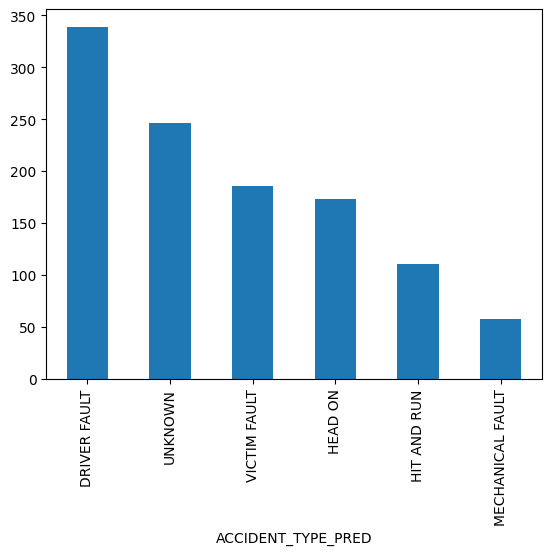

In [190]:
x=final_df['ACCIDENT_TYPE_PRED'].value_counts()
x.plot(kind='bar') 
plt.show() 

<Axes: title={'center': 'Accident Types at NAIROBI MOMBASA Road'}, xlabel='ACCIDENT_TYPE_PRED'>

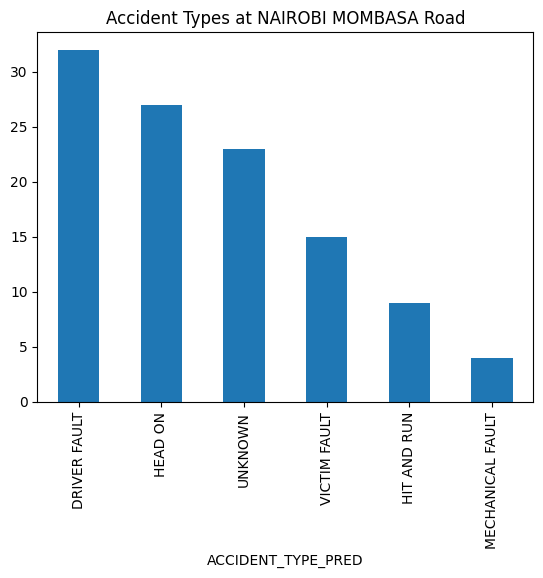

In [191]:
def accident_type_by_road(road_name):
    subset = final_df[final_df['NORMALIZED_ROAD'] == road_name]
    x=subset['ACCIDENT_TYPE_PRED'].value_counts()
    return x.plot(kind='bar',title=f'Accident Types at {road_name} Road')
accident_type_by_road('NAIROBI MOMBASA')


<Axes: title={'center': 'Accident Causes at KISUMU KAKAMEGA Road'}, xlabel='FINAL_VEHICLE'>

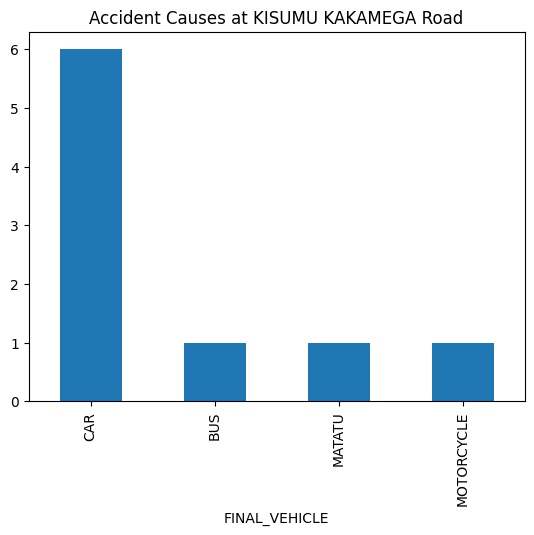

In [192]:
def accident_cause_by_road(road_name):
    subset = final_df[final_df['NORMALIZED_ROAD'] == road_name]
    x=subset['FINAL_VEHICLE'].value_counts()
    return x.plot(kind='bar',title=f'Accident Causes at {road_name} Road',)
accident_cause_by_road('KISUMU KAKAMEGA')

<Axes: title={'center': 'Accident Types in MOMBASA'}, xlabel='ACCIDENT_TYPE_PRED'>

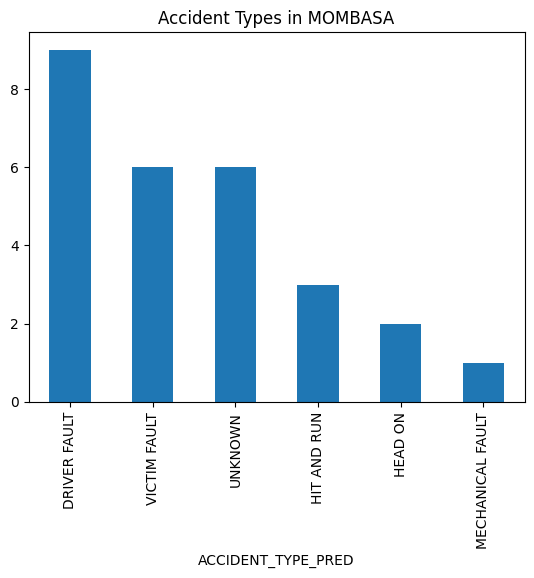

In [193]:
def accident_type_by_area(county_name):
    df = final_df[final_df['COUNTY'] == county_name]
    x=df['ACCIDENT_TYPE_PRED'].value_counts()
    return x.plot(kind='bar', title=f'Accident Types in {county_name}')
accident_type_by_area('MOMBASA')

<Axes: title={'center': 'Accident Trends Over Time'}, xlabel='TIME 24 HOURS'>

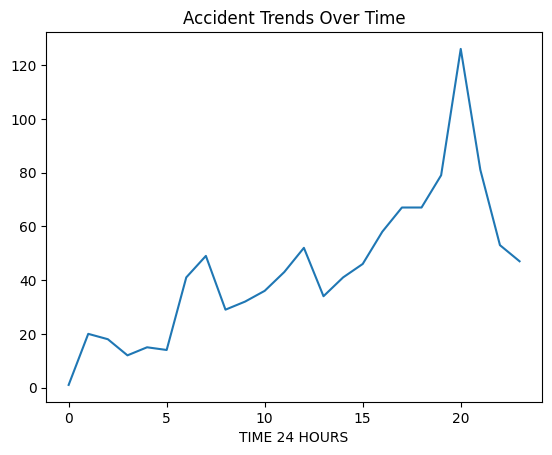

In [194]:
#accidents trends with time
time = pd.to_datetime(
    final_df['TIME 24 HOURS'],
    format='%H:%M',
    errors='coerce'
)
hour_counts = (
    time
    .dt.hour
    .value_counts()
    .sort_index()
)

hour_counts.plot(kind='line', title='Accident Trends Over Time')

<Axes: title={'center': 'Accident Distribution by Time of Day'}, ylabel='count'>

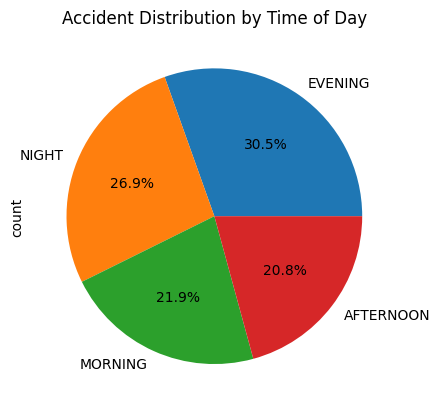

In [195]:
#pie chart for accident times
time_of_day_counts = final_df['TIMEOFDAY'].value_counts()
time_of_day_counts.plot(kind='pie', title='Accident Distribution by Time of Day', autopct='%1.1f%%')